### Implementation of an Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id'])

y = df['Species']
y = pd.DataFrame(y)
X = df.drop(columns=['Species'])

In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
encoder = OneHotEncoder(sparse_output=False)
X_new = scaler.fit_transform(X)
y_new = encoder.fit_transform(y)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(135, 4) (135, 3)
(15, 4) (15, 3)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)/2

def relu(z):
    return max(0, z)

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def relu_derivative(z):
    return (z > 0).astype(int)

def mse_derivative(y_true, y_pred):
    return -(y_true - y_pred)

def cross_entropy_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-9))

# derivative for backprop
def cross_entropy_derivative(y_true, y_pred):
    return (y_pred - y_true)

def softmax_jacobian(s):
    s = s.reshape(-1, 1)
    J = np.diagflat(s) - np.dot(s, s.T)
    return J


In [6]:
np.random.seed(42)
W1 = np.random.rand(4,6) * 0.01
b1 = np.random.rand(1,6) * 0.01
W2 = np.random.rand(6,3) * 0.01
b2 = np.random.rand(1,3) * 0.01


In [13]:
learning_rate = 0.001

In [14]:
g = []
epochs = 100
for l in range(epochs):
    total_error = 0
    for x in range(X_train.shape[0]):

        h1_net = np.dot(X_train[x], W1) + b1
        h1_out = np.zeros(h1_net.shape)
        for i in range(h1_net.shape[1]):
            h1_out[0,i] = relu(h1_net[0,i])
        # print(f"h1_net: {h1_net}")
        # print(f"After passing h1_net through ReLU function:")
        # print(f"h1_out: {h1_out}")

        o_net = np.dot(h1_out, W2) + b2
        o_out = np.empty(o_net.shape)
        for i in range(o_net.shape[0]):
            o_out = softmax(o_net)
        # print(f"o_net: {o_net}")
        # print(f"After passing o_net through softmax function:")
        # print(f"o_out: {o_out}")

        Error = cross_entropy_loss(y_train[x], o_out)
        # print("Error: {0}".format(Error))
        total_error += Error

        dE_by_do_out = cross_entropy_derivative(y_train[x], o_out) #---> del(Error)/del(o_out)
        # do_out_by_do_net = softmax_jacobian(o_out)                  #---> del(o_out)/del(o_net)
        dZ2 = dE_by_do_out
        do_net_by_dw2 = h1_out.T

        dW2 = do_net_by_dw2 @ dZ2
        db2 = dZ2

        dA1 = dZ2 @ W2.T
        dZ1 = dA1 * relu_derivative(h1_net)
        dW1 = (X_train[x].T).reshape(4,1) @ dZ1
        db1 = dZ1

        W1 = W1 - (learning_rate * dW1)
        b1 = b1 - (learning_rate * db1)
        W2 = W2 - (learning_rate * dW2)
        b2 = b2 - (learning_rate * db2)

    print(f"Epoch: {l+1}/{epochs} | Error: {total_error}")
    g.append(total_error)

Epoch: 1/100 | Error: 148.36589357320753
Epoch: 2/100 | Error: 148.35797829530412
Epoch: 3/100 | Error: 148.35059341915218
Epoch: 4/100 | Error: 148.34366726552304
Epoch: 5/100 | Error: 148.33713126992103
Epoch: 6/100 | Error: 148.3309193589538
Epoch: 7/100 | Error: 148.3249677557598
Epoch: 8/100 | Error: 148.31921437596498
Epoch: 9/100 | Error: 148.31359756651884
Epoch: 10/100 | Error: 148.3080643807354
Epoch: 11/100 | Error: 148.30254126908326
Epoch: 12/100 | Error: 148.2969565082583
Epoch: 13/100 | Error: 148.29124431676263
Epoch: 14/100 | Error: 148.28534103941237
Epoch: 15/100 | Error: 148.27916720181915
Epoch: 16/100 | Error: 148.27264274259386
Epoch: 17/100 | Error: 148.26569763994553
Epoch: 18/100 | Error: 148.2582603473404
Epoch: 19/100 | Error: 148.25021467031817
Epoch: 20/100 | Error: 148.24141813541652
Epoch: 21/100 | Error: 148.23174161372194
Epoch: 22/100 | Error: 148.2210733757189
Epoch: 23/100 | Error: 148.2092686086014
Epoch: 24/100 | Error: 148.1961458623967
Epoch: 25

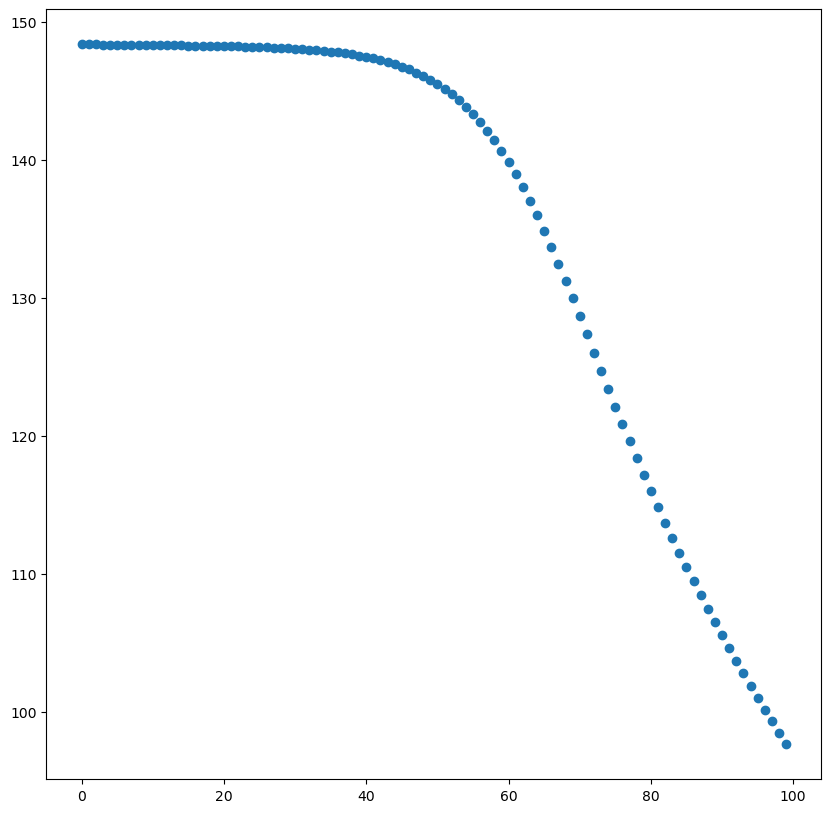

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
plt.scatter([i for i in range(epochs)], g)


In [16]:
# for f in range(X_test.shape[0]):
#     X_sample = X_test[f]
#     y_sample = y_test[f]
#
#     H1_net = np.dot(X_sample, W1) + b1
#     H1_out = relu(H1_net)
#     O_net = np.dot(H1_net, W2) + b2
#     O_out = softmax(O_net)
#
#     output = []
#
#     if np.argmax(O) == 0:
#         output = [1,0,0]
#     elif np.argmax(O) == 1:
#         output = [0,1,0]
#     elif np.argmax(O) == 2:
#         output = [0,0,1]
#
#     print(y_sample , output)

In [17]:

correct = 0

for f in range(X_test.shape[0]):

    X_sample = X_test[f]
    y_sample = y_test[f]

    H1_net = np.dot(X_sample, W1) + b1
    H1_out = np.zeros(H1_net.shape)
    for i in range(H1_net.shape[1]):
        H1_out[0,i] = relu(H1_net[0,i])

    O_net = np.dot(H1_out, W2) + b2
    O_out = np.empty(O_net.shape)
    for i in range(O_net.shape[0]):
        O_out = softmax(O_net)

    output = np.zeros(3)
    output[np.argmax(O_out)] = 1

    # print(y_sample, output)

    pred_class = np.argmax(output)
    true_class = np.argmax(y_sample)
    if pred_class == true_class:
        correct += 1

accuracy = (correct / X_test.shape[0]) * 100
print(f"Accuracy: {accuracy}%")
# print(correct)

Accuracy: 73.33333333333333%


In [1]:
'hi'

'hi'